In [21]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importar biblioteca do sklearn para k-NN (k-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
# importar biblioteca do sklearn para divisão de dados em treino e teste
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
# importar biblioteca do sklearn para avaliação do modelo
from sklearn.metrics import accuracy_score
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:
# Importar arquivo CSV para um dataframe
df_telefones_moveis = pd.read_csv("com360-telefones-moveis.csv")
df_telefones_moveis.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,cheap
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,fair
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,fair
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,fair
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,cheap
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,cheap
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,expensive
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,too-cheap
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,too-cheap
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,too-cheap


In [3]:
df_telefones_moveis.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [4]:
df_telefones_moveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
# Imprimir valores único da coluna "price_range"
df_telefones_moveis["price_range"].unique()

array(['cheap', 'fair', 'expensive', 'too-cheap'], dtype=object)

In [6]:
# Criar coluna para transformar a coluna "price_range" em valores inteiros (0 = too-cheap, 1 = cheap, 2 = fair, 3 = expensive)
df_telefones_moveis["price_range_int"] = df_telefones_moveis["price_range"].map({"too-cheap": 0, "cheap": 1, "fair": 2, "expensive": 3})
df_telefones_moveis.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_range_int
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,cheap,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,fair,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,fair,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,fair,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,cheap,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1654,1067,17,1,10,1,0,0,cheap,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,1018,3220,13,8,18,1,0,1,expensive,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,1149,700,16,3,5,1,1,1,too-cheap,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,836,1099,17,1,20,1,0,0,too-cheap,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1224,513,19,10,12,1,0,0,too-cheap,0


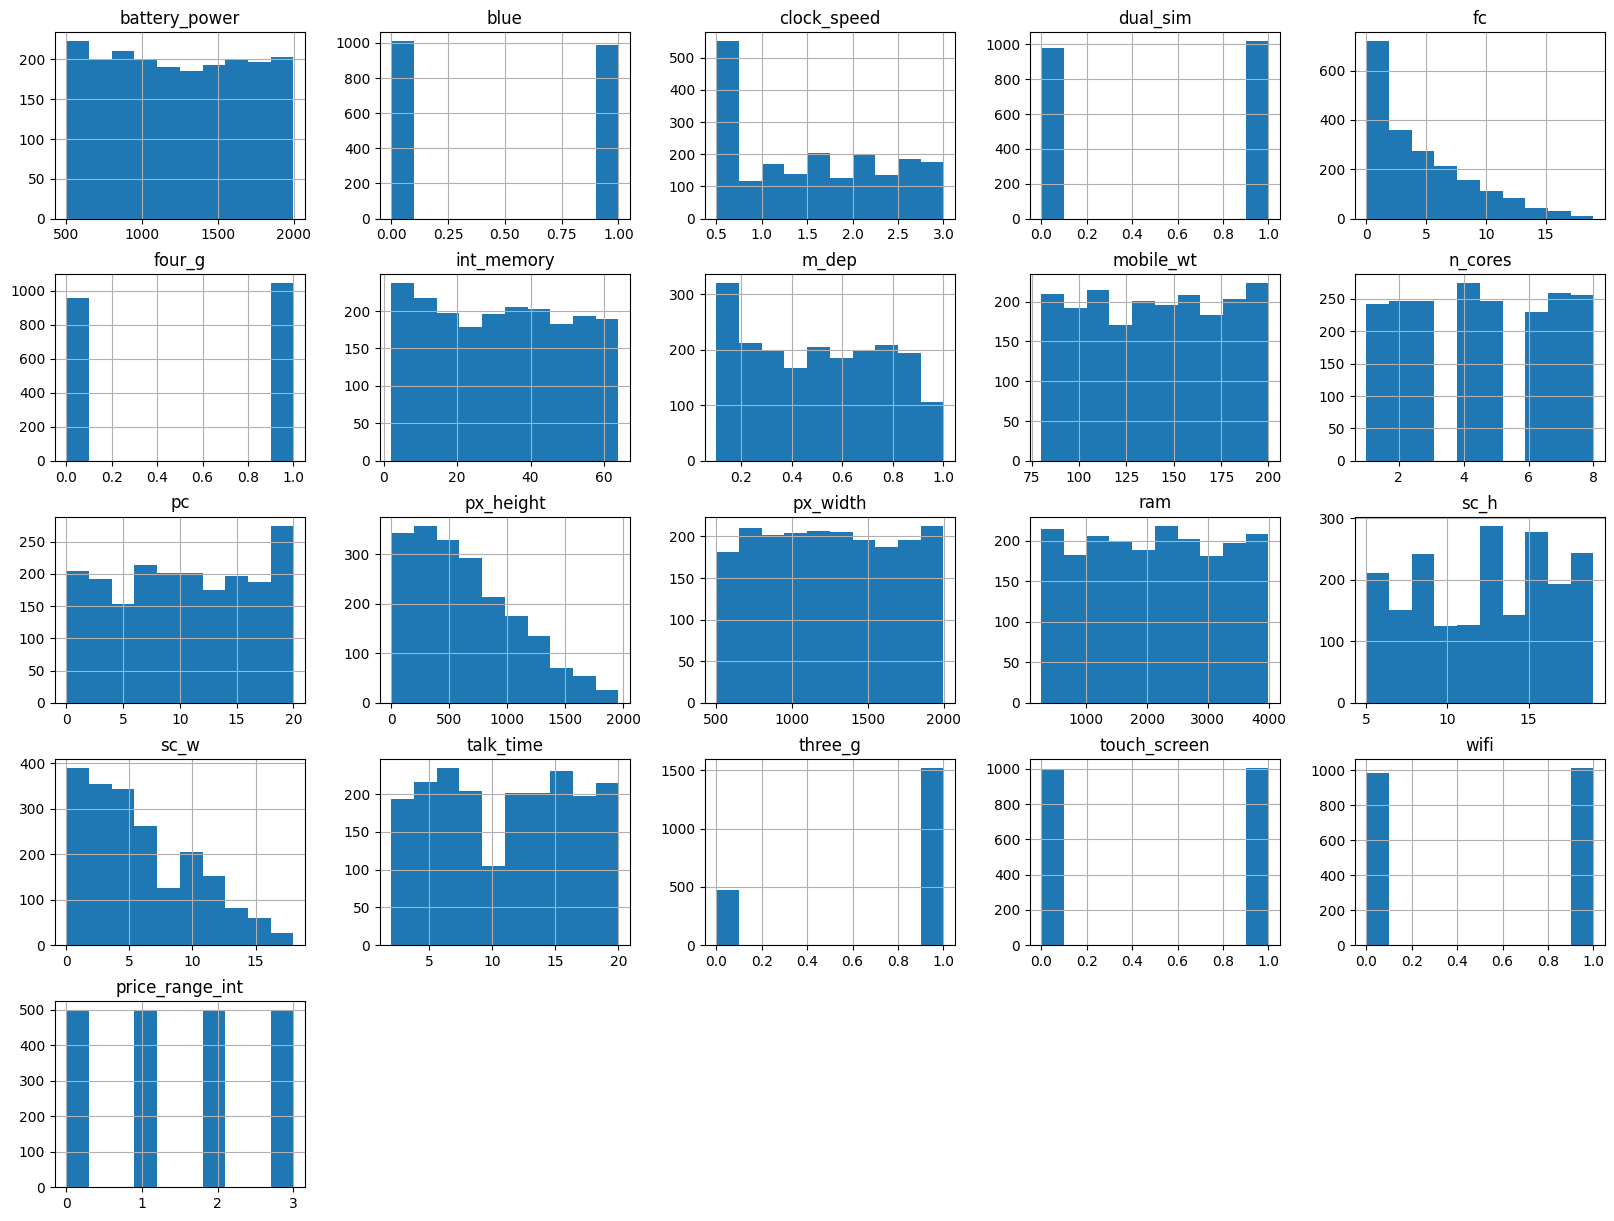

In [7]:
# Gerar histogramas dos diversos atributos
df_telefones_moveis.hist(figsize=(20,15))
plt.show()

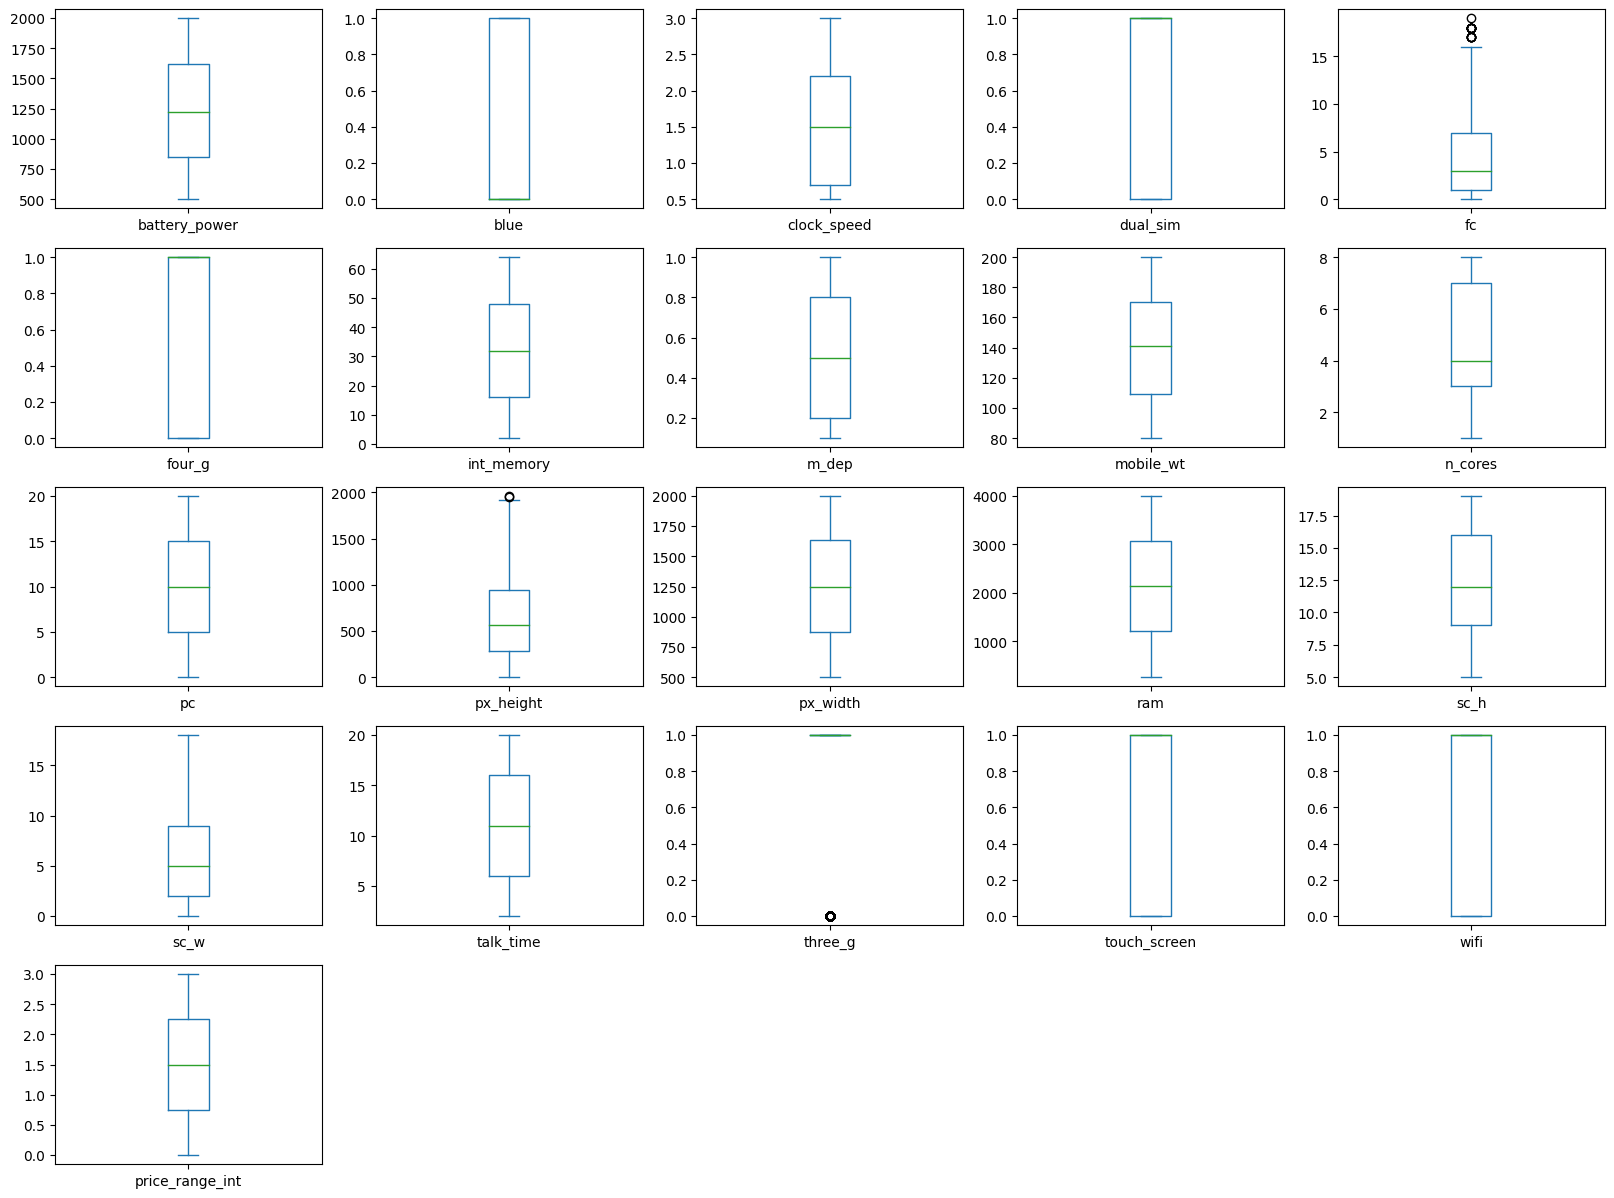

In [15]:
# Verificar anomalias nos dados
df_telefones_moveis.plot(kind="box", subplots=True, layout=(5,5), figsize=(20,15))
plt.show()

In [17]:
# Separar os dados em 10% para teste e 90% para treino
telefones_atributos = df_telefones_moveis.drop(["price_range", "price_range_int"], axis=1)
telefones_classes = df_telefones_moveis["price_range_int"]

atributos_treino, atributos_teste, classes_treino, classes_teste = train_test_split(telefones_atributos, telefones_classes, test_size=0.1, random_state=10)

In [18]:
# Usar o algoritmo k-NN para classificar os dados usando cross_validation
k_vizinhos = 5
funcao_peso = 'uniform'
algoritmo = 'auto'
classificadorKNN = KNeighborsClassifier(n_neighbors=k_vizinhos, weights=funcao_peso, algorithm=algoritmo)

In [25]:
# avaliar o modelo usando cross_validation
cv = 10
metrica = 'accuracy'
scores = cross_validate(classificadorKNN, telefones_atributos, telefones_classes, cv=cv, scoring=metrica)

c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gusta\univesp_disciplinas\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Us